In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score ,confusion_matrix

In [2]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [3]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dftrain.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
dftest.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [7]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null

In [8]:
dftrain.drop(["Cabin"],axis=1,inplace=True)
dftest.drop(["Cabin"],axis=1,inplace=True)

In [9]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

In [10]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

In [11]:
from statistics import mean
dftrain['Age'].fillna((dftrain['Age'].mean()), inplace=True)
dftest['Age'].fillna((dftest['Age'].mean()), inplace=True)

In [12]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

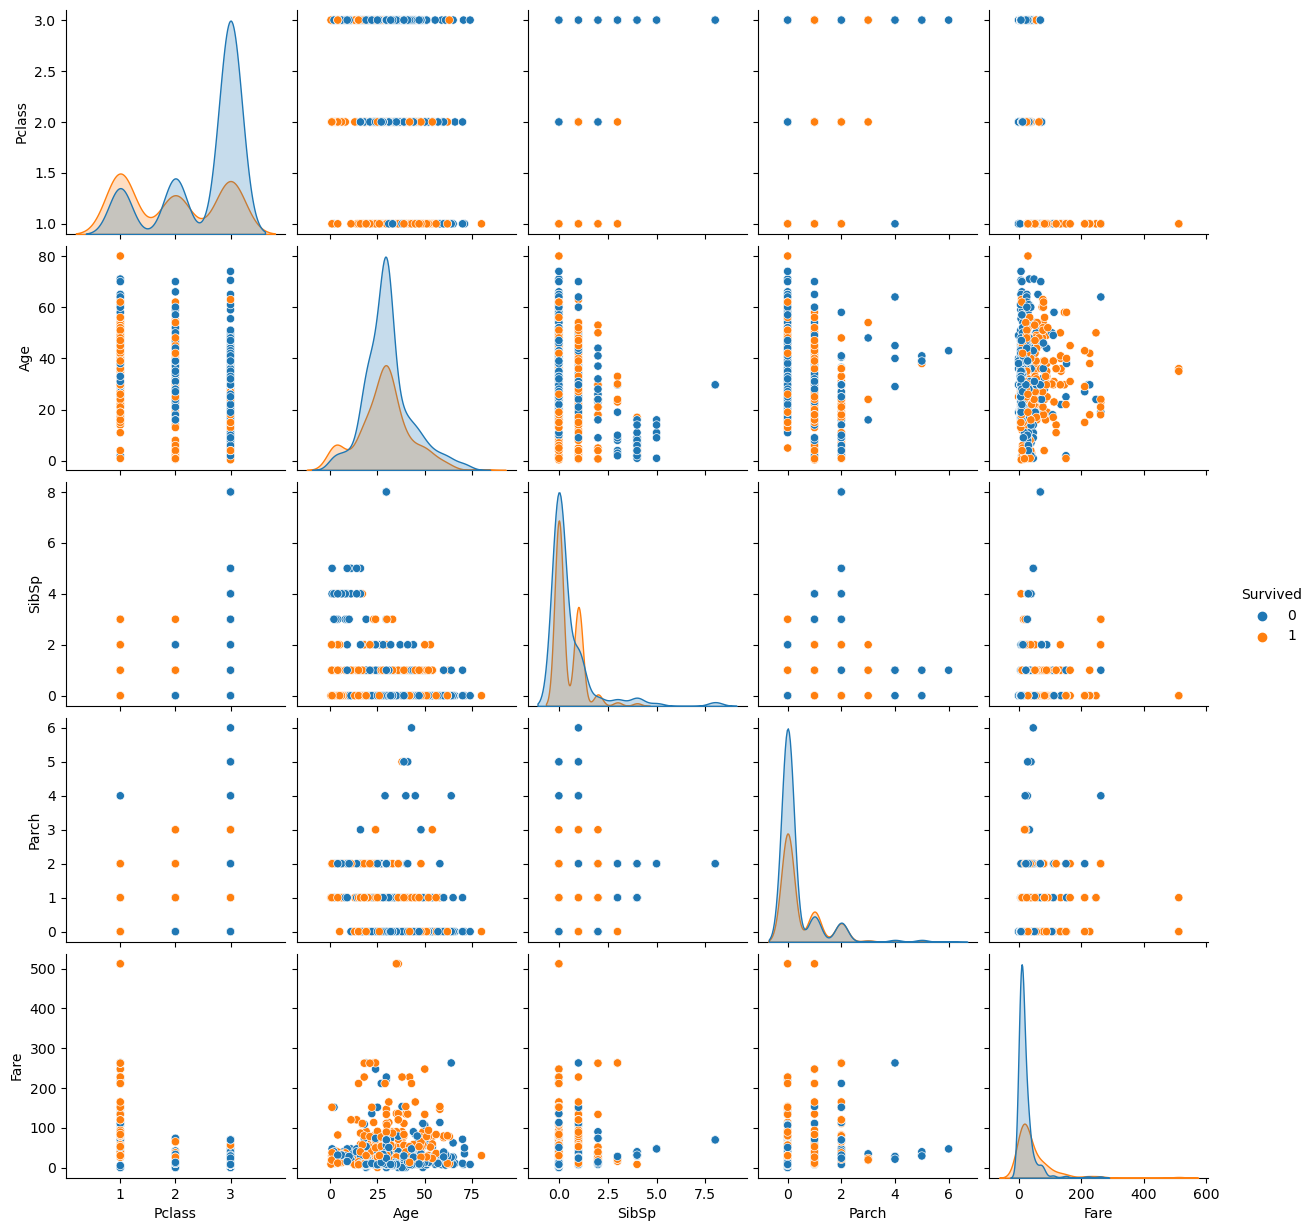

In [13]:
sns.pairplot(dftrain,hue="Survived")

C:\Users\mvalavi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare2', ylabel='Density'>

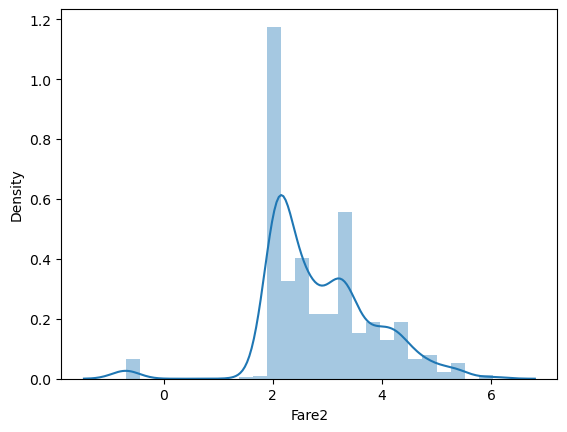

In [15]:
from scipy import stats


#transform the data using box-cox
dftrain["Fare2"], lmbda = stats.boxcox(dftrain["Fare"]+0.5)
#plot the distribution curve
sns.distplot(dftrain["Fare2"])

C:\Users\mvalavi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass2', ylabel='Density'>

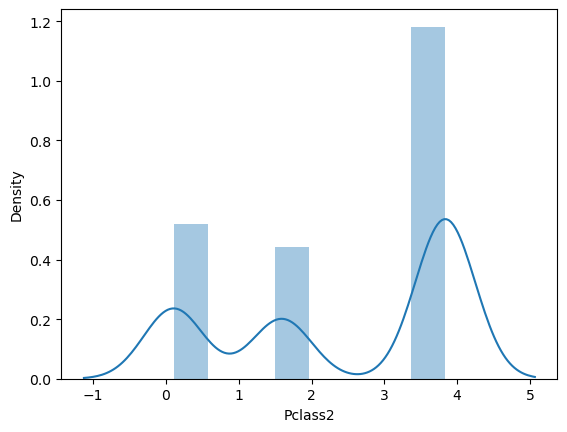

In [16]:
from scipy import stats


#transform the data using box-cox
dftrain["Pclass2"], lmbda = stats.boxcox(dftrain["Pclass"]+0.1)
#plot the distribution curve
sns.distplot(dftrain["Pclass2"])

In [17]:
#just apply it to Fare
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Fare2     891 non-null    float64
 9   Pclass2   891 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 69.7+ KB


In [18]:
dftrain.drop(["Fare"],axis=1,inplace=True)

In [19]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Fare2     891 non-null    float64
 8   Pclass2   891 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null

In [20]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Fare2     891 non-null    float64
 8   Pclass2   891 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null

In [21]:
dftrain.drop(["Pclass2"],axis=1,inplace=True)

In [22]:
#checking for outliners

array([[<AxesSubplot:title={'center':'SibSp'}>]], dtype=object)

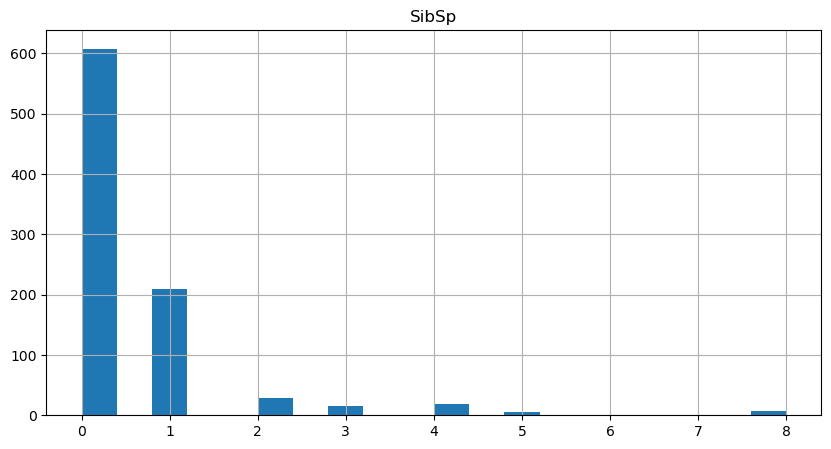

In [23]:
dftrain.hist(column = 'SibSp',bins=20, figsize=(10,5))

array([[<AxesSubplot:title={'center':'Pclass'}>]], dtype=object)

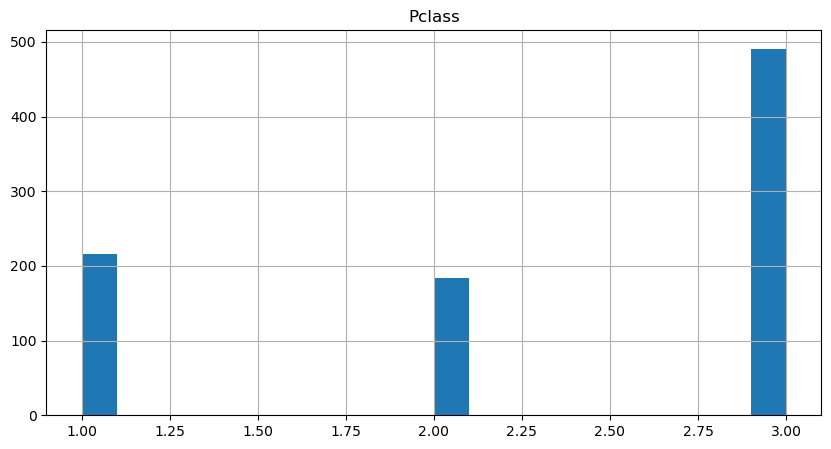

In [24]:
dftrain.hist(column = 'Pclass',bins=20, figsize=(10,5))

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

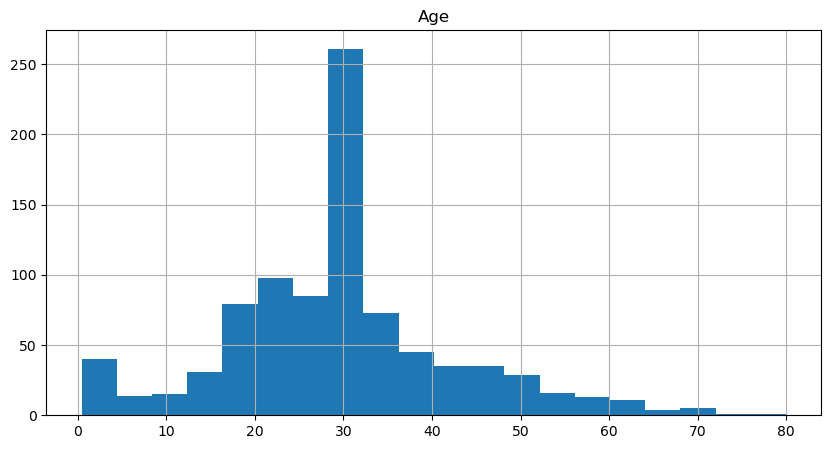

In [25]:
dftrain.hist(column = 'Age',bins=20, figsize=(10,5))

In [26]:
#so there is no ouliners in numeric values

In [27]:
#check effect of for categorial values

<AxesSubplot:xlabel='Sex', ylabel='Count'>

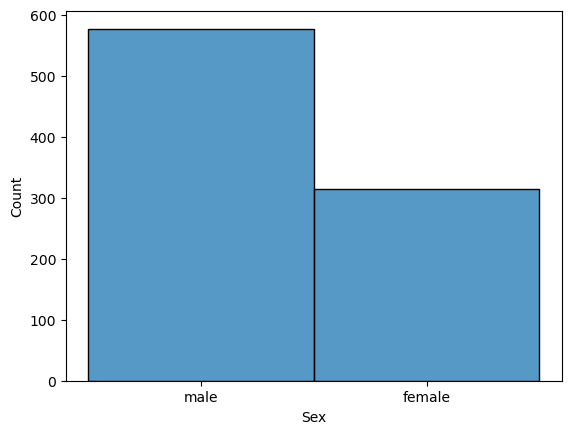

In [28]:
sns.histplot(data=dftrain,x="Sex")

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

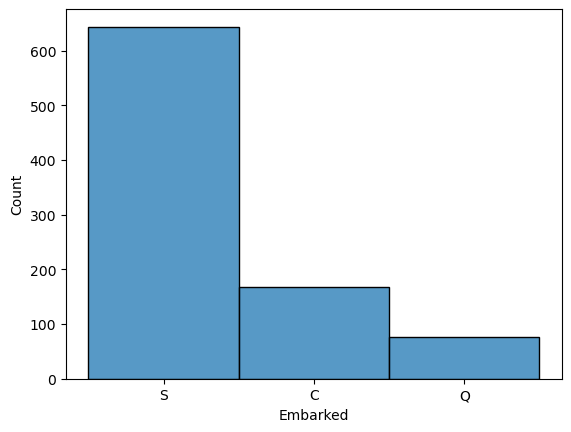

In [29]:
#so sex has effect less check embarked
sns.histplot(data=dftrain,x="Embarked")

In [30]:
#check for correlation of variable to each other
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Fare2     891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

In [31]:
#so data are not correlated

In [32]:
#deal with categorial value and filling with most repeatable data


dftrain.fillna(dftrain.select_dtypes(include='object').mode().iloc[0], inplace=True)
dftest.fillna(dftest.select_dtypes(include='object').mode().iloc[0], inplace=True)
dftest.fillna(dftest["Fare"].mode().iloc[0], inplace=True)

In [33]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
 7   Fare2     891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null

In [34]:
dftrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare2
0,0,3,male,22.0,1,0,S,2.025210
1,1,1,female,38.0,1,0,C,4.176500
2,1,3,female,26.0,0,0,S,2.106857
3,1,1,female,35.0,1,0,S,3.897136
4,0,3,male,35.0,0,0,S,2.121249


In [35]:
dumtrain=pd.get_dummies(dftrain,columns = ["Sex","Embarked"]
               ,drop_first = True)
dumtest=pd.get_dummies(dftest,columns = ["Sex","Embarked"]
               ,drop_first = True)

In [36]:
#Model Construction
from sklearn.preprocessing import StandardScaler
dftrain_outdata = dumtrain.drop(["Survived","Sex_male","Embarked_Q","Embarked_S"], axis=1)
dftrain_outdata2=dumtrain[["Survived","Sex_male","Embarked_Q","Embarked_S"]].copy()
scaler = StandardScaler()
out_dftrain = scaler.fit_transform(dftrain_outdata)

dftest_outdata = dumtest.drop(["Sex_male","Embarked_Q","Embarked_S"], axis=1)
dftest_outdata2=dumtest[["Sex_male","Embarked_Q","Embarked_S"]].copy()
scaler = StandardScaler()
out_dftest = scaler.fit_transform(dftest_outdata)

In [37]:
out_dftrain=pd.DataFrame(out_dftrain,columns=["Age","Pclass","SibSp","Parch","Fare2"])

out_dftest=pd.DataFrame(out_dftest,columns=["Age","Pclass","SibSp","Parch","Fare"])

In [38]:
finaltrain=pd.concat([out_dftrain,dftrain_outdata2],axis=1)

In [39]:
finaltrain.head()

,Age,Pclass,SibSp,Parch,Fare2,Survived,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.848792,0,1,0,1
1,-1.566107,0.638789,0.432793,-0.473674,1.322333,1,0,0,0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.766393,1,0,0,1
3,-1.566107,0.407926,0.432793,-0.473674,1.040393,1,0,0,1
4,0.827377,0.407926,-0.474545,-0.473674,-0.751869,0,1,0,1


In [40]:
from sklearn.preprocessing import StandardScaler

out_dftest=pd.DataFrame(out_dftest,columns=["Age","Pclass","SibSp","Parch","Fare"])
finaltest=pd.concat([out_dftest,dftest_outdata2],axis=1)


In [41]:
from sklearn.preprocessing import StandardScaler
dftest_outdata = dumtest.drop(["Sex_male","Embarked_Q","Embarked_S"], axis=1)
dftest_outdata2=dumtest[["Sex_male","Embarked_Q","Embarked_S"]].copy()
scaler = StandardScaler()
out_dftest = scaler.fit_transform(dftest_outdata)

out_dftest=pd.DataFrame(out_dftest,columns=["Age","Pclass","SibSp","Parch","Fare"])
finaltest=pd.concat([out_dftest,dftest_outdata2],axis=1)
finaltest.head()

,Age,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.873482,0.334993,-0.499470,-0.400248,-0.497063,1,1,0
1,0.873482,1.325530,0.616992,-0.400248,-0.511926,0,0,1
2,-0.315819,2.514175,-0.499470,-0.400248,-0.463754,1,1,0
3,0.873482,-0.259330,-0.499470,-0.400248,-0.482127,1,0,1
4,0.873482,-0.655545,0.616992,0.619896,-0.417151,0,0,1


In [ ]:
#good SVM

#https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

In [48]:
X=finaltrain.drop("Survived",axis=1)
y= finaltrain['Survived']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Import svm model
from sklearn import svm

#Create a svm Classifier
svm0 = svm.SVC(kernel="rbf") # Linear Kernel
svm0.fit(X_train,y_train)

prediction0=svm0.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix, f1_score


f1_score(prediction0,y_test)

0.7787610619469026

In [49]:
predictiontestcv=svm0.predict(finaltest)
dfx = pd.DataFrame(predictiontestcv,columns = ['Column_A'])
dfx.to_csv('svm0.csv')

C:\Users\mvalavi\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare
Feature names seen at fit time, yet now missing:
- Fare2

  warnings.warn(message, FutureWarning)
